In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

from utils import fraud_ratio

pl.Config.set_tbl_rows(999999)
pl.Config.set_tbl_cols(999999)
pl.Config.set_fmt_str_lengths(500)


polars.config.Config

In [3]:
trans_df = pl.read_csv("data/credit_card_transactions-ibm_v2.csv")
trans_df = trans_df.select(pl.col(["User", "Card", "Amount", "Is Fraud?"]))
user_df = pl.read_parquet("data/user_df.parquet")
trans_df = trans_df.join(user_df, on="User", how="left")

trans_df.head()

User,Card,Amount,Is Fraud?,Retirement_Age,Birth_Year,Birth_Month,Gender,Apartment,User_City,User_State,User_Zipcode,Per_Capita_Income_Zipcode,Yearly_Income_Person,Total_Debt,Person_Location_Income_ratio,Person_Income_toDebt,Location_Income_toDebt,FICO_Score,FICO_Score_Rank,Num_Credit_Cards
i64,i64,str,str,i64,i64,i64,str,i64,str,str,i64,i64,i64,i64,f64,f64,f64,i64,i32,i64
0,0,"""$134.09""","""No""",66,1966,11,"""Female""",0,"""La Verne""","""CA""",91750,29278,59696,127613,2.038936,0.467789,0.229428,787,3,5
0,0,"""$38.48""","""No""",66,1966,11,"""Female""",0,"""La Verne""","""CA""",91750,29278,59696,127613,2.038936,0.467789,0.229428,787,3,5
0,0,"""$120.34""","""No""",66,1966,11,"""Female""",0,"""La Verne""","""CA""",91750,29278,59696,127613,2.038936,0.467789,0.229428,787,3,5
0,0,"""$128.95""","""No""",66,1966,11,"""Female""",0,"""La Verne""","""CA""",91750,29278,59696,127613,2.038936,0.467789,0.229428,787,3,5
0,0,"""$104.71""","""No""",66,1966,11,"""Female""",0,"""La Verne""","""CA""",91750,29278,59696,127613,2.038936,0.467789,0.229428,787,3,5


In [4]:
trans_df = trans_df.select(pl.col(["Amount", "Per_Capita_Income_Zipcode", "Yearly_Income_Person", "Total_Debt", "Person_Location_Income_ratio", "Person_Income_toDebt", "Location_Income_toDebt", "Is Fraud?"]))

In [5]:

trans_df = trans_df.with_columns([
    pl.col("Amount").str.replace(r"\$", "").cast(pl.Float64)
])

In [ ]:
trans_df = trans_df.with_columns([
    (pl.col("Amount") / (pl.col("Yearly_Income_Person") + 0.01))
        .alias("Amount_to_Income_Ratio"),
    (pl.col("Amount") / (pl.col("Per_Capita_Income_Zipcode") + 0.01))
        .alias("Amount_to_LocalIncome_Ratio"),
    (pl.col("Total_Debt") / (pl.col("Yearly_Income_Person") + 0.01))
        .alias("Debt_to_Income")
])

In [ ]:
#trans_df = trans_df.to_pandas()
#df1 = trans_df.loc[trans_df["Is Fraud?"] == "Yes"]
#df2 = trans_df.loc[trans_df["Is Fraud?"] == "No"]
df1 = trans_df.filter(pl.col("Is Fraud?") == "Yes")
df2 = trans_df.filter(pl.col("Is Fraud?") == "No")

sns.set_theme()
plt.figure(figsize=(18, 4))

sns.histplot(x = df2["Amount_to_Income_Ratio"], kde=True, stat='density', label='Normal')
sns.histplot(x = df1["Amount_to_Income_Ratio"], kde=True, stat='density', label='Fraud')
plt.legend()
plt.xlim(-1, 1)
plt.show()

In [6]:
df1["Amount"].head(10)

Series([], Name: Amount, dtype: float64)

In [3]:

card_df = pl.read_csv("data/sd254_cards.csv")

In [4]:
card_df.select(pl.all().n_unique())

User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
2000,9,4,3,6146,259,998,2,3,3654,303,19,1


In [5]:
card_df.select(pl.all().is_null().sum())

User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
C

In [12]:
trans_df = trans_df.with_columns(
    pl.when(pl.col("FICO_Score") < 580)
    .then(0)
    .when(pl.col("FICO_Score") < 670)
    .then(1)
    .when(pl.col("FICO_Score") < 740)
    .then(2)
    .when(pl.col("FICO_Score") < 800)
    .then(3)
    .otherwise(4)
    .alias("FICO_Score_Rank")
)

In [4]:
trans_rename_dict = {
    'Use Chip': 'Use_Chip',
    'Merchant Name': 'Merchant_Name',
    'Merchant City': 'Merchant_City',
    'Merchant State': 'Merchant_State',
    'Errors?': 'Errors',
    'Is Fraud?': 'Is_Fraud'
}
trans_df = trans_df.rename(trans_rename_dict)

trans_df = trans_df.with_columns([
    pl.when(pl.col("Is_Fraud") == "Yes")
      .then(pl.lit(1))
      .otherwise(pl.lit(0))
      .alias("Is_Fraud")
])

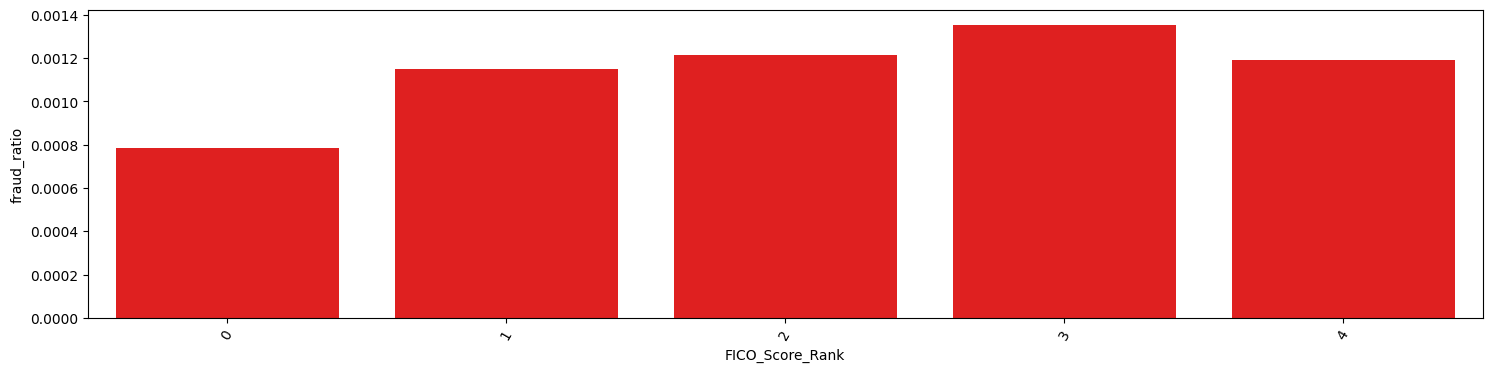

In [16]:
count_pd = fraud_ratio(trans_df, "FICO_Score_Rank")

plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="FICO_Score_Rank", y="fraud_ratio", color="red")
plt.xticks(rotation=60)
plt.savefig(f'log/fico.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
trans_df["MCC"].n_unique()

109

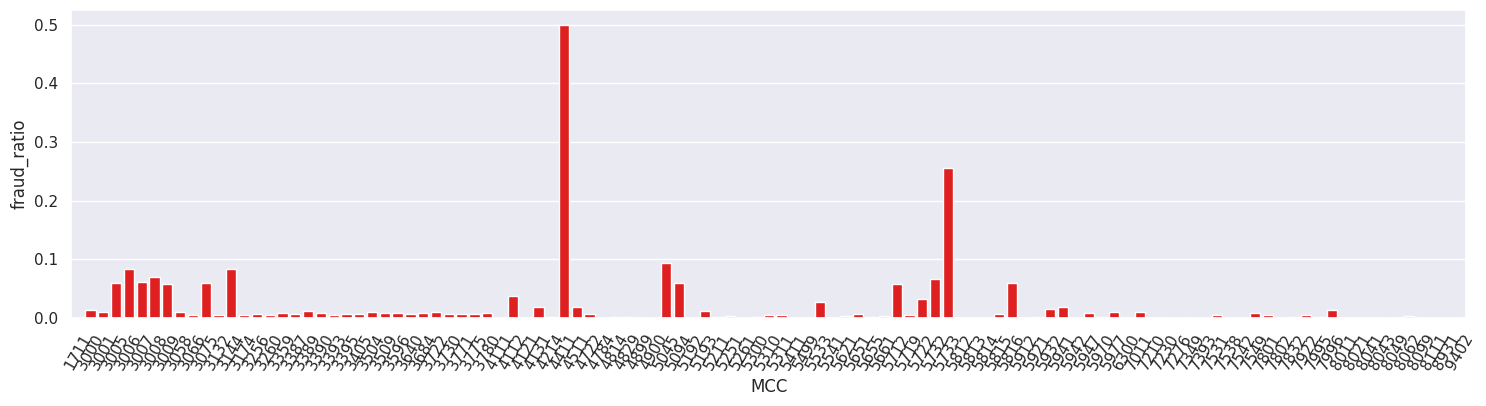

In [6]:
count_pd = fraud_ratio(trans_df, "MCC")

sns.set_theme()
plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="MCC", y="fraud_ratio", color="red")
plt.xticks(rotation=60)
plt.savefig(f'log/fico.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
trans_df.select(pl.col("MCC")).value_counts()

/tmp/ipykernel_74764/1865306342.py:12: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count())
/tmp/ipykernel_74764/1865306342.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  grouped.pivot(values="cnt", columns="Is_Fraud", index=col)


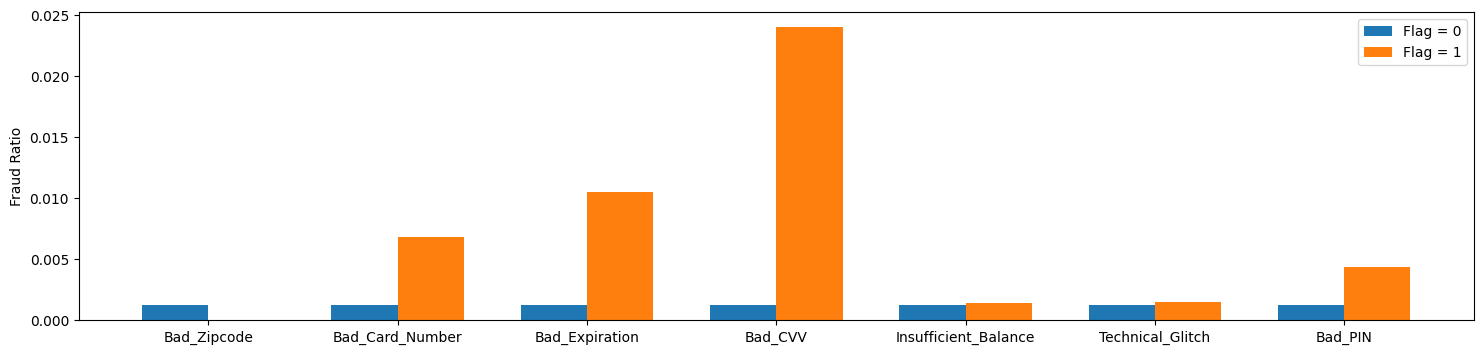

In [ ]:
import numpy as np

unique_errors = [
    "Bad Zipcode",
    "Bad Card Number",
    "Bad Expiration",
    "Bad CVV",
    "Insufficient Balance",
    "Technical Glitch",
    "Bad PIN"
]

error_flags = unique_errors

fraud_ratio_when_flag0 = []
fraud_ratio_when_flag1 = []

for col in error_flags:
    # col(=Error_flag_i), Fraud(=0/1)로 그룹바이 후 건수 집계
    grouped = (
        trans_df.group_by([col, "Is_Fraud"])
          .agg(pl.len())
          .rename({"count": "cnt"})
    )
    # pivot (행=Error_flag_i(0/1), 열=Fraud(0/1), 값=cnt)
    pivoted = (
        grouped.pivot(values="cnt", columns="Is_Fraud", index=col)
               .fill_null(0)  # 결측은 0으로 처리
    )
    
    # (flag=0) 그룹의 전체/이상 건수
    try:
        c0_fraud = pivoted.filter(pl.col(col)==0).select("1").to_series()[0]
    except:
        c0_fraud = 0
    try:
        c0_total = pivoted.filter(pl.col(col)==0).select(["0","1"]).row(0)
        c0_total = sum(c0_total)  # (정상 + 이상) 합
    except:
        c0_total = 0

    # (flag=1) 그룹의 전체/이상 건수
    try:
        c1_fraud = pivoted.filter(pl.col(col)==1).select("1").to_series()[0]
    except:
        c1_fraud = 0
    try:
        c1_total = pivoted.filter(pl.col(col)==1).select(["0","1"]).row(0)
        c1_total = sum(c1_total)
    except:
        c1_total = 0

    # 각각 이상거래/전체거래 비율
    fr0 = c0_fraud / c0_total if c0_total > 0 else 0
    fr1 = c1_fraud / c1_total if c1_total > 0 else 0

    fraud_ratio_when_flag0.append(fr0)
    fraud_ratio_when_flag1.append(fr1)

x = np.arange(len(error_flags))
bar_width = 0.35

plt.figure(figsize=(18,4))

plt.bar(x - bar_width/2,
        fraud_ratio_when_flag0,
        width=bar_width,
        label='Flag = 0')

plt.bar(x + bar_width/2,
        fraud_ratio_when_flag1,
        width=bar_width,
        label='Flag = 1')

plt.xticks(x, error_flags)
plt.ylabel("Fraud Ratio")
plt.legend()
plt.savefig(f'log/error.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_220264/4161202534.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, y='Merchant_State', order=df_filtered['Merchant_State'].value_counts().index, palette=sns.color_palette('coolwarm', 10))


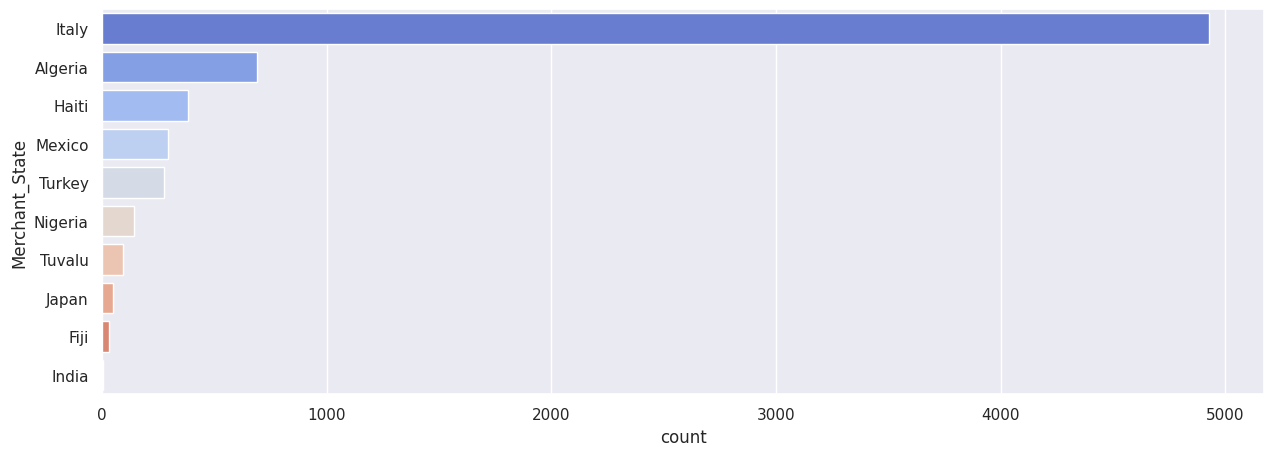

In [2]:
import pandas as pd 

df_fraud = trans_df.filter(pl.col("Is_Fraud") == 1)
df_fraud = df_fraud.to_pandas()

sns.set_theme()

us_states = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA",
    "HI","ID","IL","IN","IA","KS","KY","LA","ME","MD",
    "MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC",
    "SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"
}

df_filtered = df_fraud[~df_fraud["Merchant_State"].isin(us_states)]


plt.figure(figsize=(15, 5))  
sns.countplot(data=df_filtered, y='Merchant_State', order=df_filtered['Merchant_State'].value_counts().index, palette=sns.color_palette('coolwarm', 10))
plt.savefig(f'log/abroad.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
df_filtered = (
    trans_df
    .filter(~pl.col("Merchant_State").is_in(us_states))
)

df_filtered["Merchant_State"].n_unique()

173

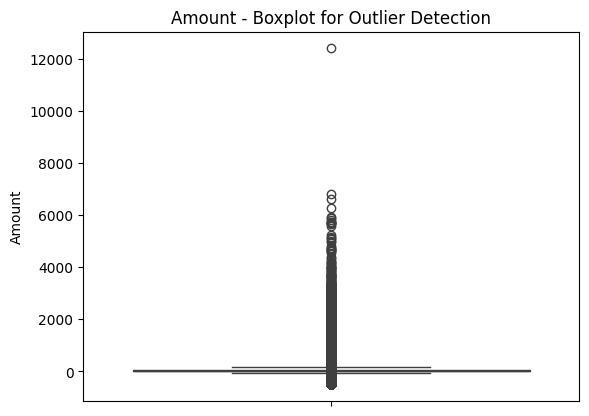

In [ ]:
df_pd = trans_df.select("Amount", "Is_Fraud").to_pandas()

plt.figure()  # 새로운 Figure 생성
sns.boxplot(data = df_pd, x="Is")  # 결측 제거 후 Boxplot
plt.show()

In [2]:
trans_df.height

26459010

In [5]:
trans_df.filter(pl.col("Amount") > 4000).height

39

In [9]:
trans_df.filter(pl.col("Amount") > 1000).height

17206

In [10]:
trans_df.filter(pl.col("Amount") > 1000).height / trans_df.height

0.0006502888808009068